## Classificação de textos com spaCy

### Etapa 1: importação e instalação das bibliotecas

In [4]:
import spacy
spacy.__version__

'3.3.1'

In [5]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np


### Etapa 2: Carregamento da base de dados 

In [6]:
base_dados = pd.read_csv('Arquivos/base_treinamento.txt', encoding='utf-8')
base_dados.shape

(196, 2)

In [7]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [8]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


c:\Users\vitao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emocao', ylabel='count'>

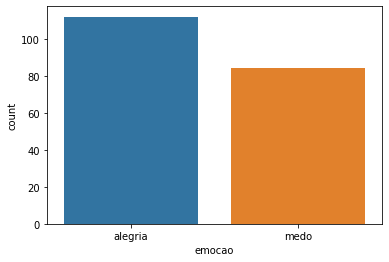

In [9]:
sns.countplot(base_dados['emocao'],label='Contagem')

### Etapa 3: Função para pré processamento dos textos

In [10]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [12]:
len(stop_words)

416

In [13]:
pln = spacy.load('pt_core_news_sm')
pln

In [14]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    lista = []
    for token in documento:
        #lista.append(token.text)
        lista.append(token.lemma_)
    
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    return lista

In [15]:
teste = preprocessamento('Estou aprendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso Curitiba'

### Etapa 4: Pré-processamento da base de dados

In [16]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [17]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados['texto']

0                              trabalho agradável
1                     gostar ficar em o aconchego
2                       fiz adesão a o curso hoje
3                                         admirar
4                                          adorar
                          ...                    
191         chocado amedrontar assassinato brutal
192    preciso afugentar ímpeto medo de o inferno
193           político força afugentar amedrontar
194                   objetivo de isso amedrontar
195                                      apavorar
Name: texto, Length: 196, dtype: object

In [18]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


In [19]:
exempo_base_dados = [["este trabalho é agradável",{"ALEGRIA": True, "MEDO": False}],
["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [20]:
type(exempo_base_dados)

list

In [21]:
exempo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [22]:
exempo_base_dados[0][0]

'este trabalho é agradável'

In [23]:
base_dados_final = []
i = 0
for texto, emocao in zip(base_dados['texto'],base_dados['emocao']):
    #print(texto,emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA':True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA':False, 'MEDO': True})
    base_dados_final.append([texto,dic.copy()])

In [24]:
len(base_dados_final)

196

In [25]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [26]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

### Etapa 5: Criação do Cassificador

In [ ]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []



In [ ]:
modelo.begin_training()
for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_final,30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        modelo.update(textos,annotations, losses=losses)
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.y label('Erro')

In [ ]:
modelo.to_disk("modelo")

### Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro a cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

In [ ]:
previsao.cats

### Etapa 7: Avaliação do modelo

In [ ]:
previsoes = []
for texto in base_dados['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [ ]:
previsoes_final = [previsoes]
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais,previsoes_final)

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

### Avaliação na base de teste

In [ ]:
base_dados_teste = pd.read_csv('Arquivos/base_teste.txt', encoding='utf-8')

In [ ]:
base_dados_teste.head(10)

In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head(10)

In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [ ]:
previsoes_final = [previsoes]
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values
respostas_reais

In [ ]:
accuracy_score(respostas_reais,previsoes_final)

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm